# Goal

This project focuses on people analytics, employee retention. Companies usually encounters costs of replacing, placements, new employee training when employees leave. So it's always important to understand about employee churn and optimize retention. 

Employee turn-over is always a costly problem for companies. So this project will understand when and why employees are most likely to leave. And develop strategies to improve employee retention. 

In this project, I use a data set with info about employees and predict when they are going to leave and understand key drivers of employee churn. 

# Data Description

This is a employee data from a few companies. 

We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.


- Employee_id: id of the employee. Unique by employee per company.
- Company_id: company id. Unique by company.
- Dept: employee department.
- Seniority: number of years of work experience when hired.
- Salary: average yearly salary of the employee during his/her tenure within the company.
- Join_date: when the employee joind the company, date range of this data set, 2011/01/14 to 2015/12/13.
- Quit_date: when the employee left the job (if the person was still employed by 2015/12/31, this field is NA). 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20)

data = pd.read_csv("https://drive.google.com/uc?export=download&id=10cwdWd4axXdQX-53FBecxRo1bcXcQVP4")
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [2]:
data.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [3]:
from datetime import datetime
#convert string to date
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

data.describe(include = "all")

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


Maximum value of seniority: 99 years of working experience, seems unreasonable. Remove outliner.

In [4]:
data[data['seniority']>60]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06


In [5]:
data = data[data['seniority']<=60]

# Exploratory analysis


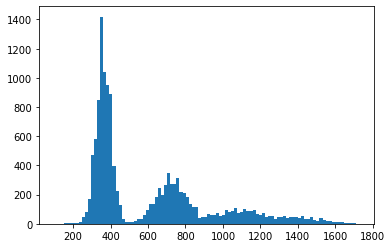

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

data['employment_length'] = (data['quit_date'] - data['join_date']).astype('timedelta64[D]')
plt.hist(data['employment_length'].dropna(), bins = 100)
plt.show()

Peaks of quit are around employee's anniversary.

Define early quitters as people who quit within 1 year: employess stayed less than 13 months. 
So define of label of early quitter and create two classes of users.
If people haven't been in the current company for at least 13 months, remove them from the current dataset.  

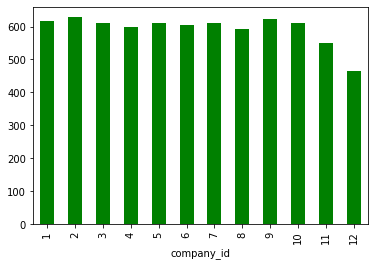

In [7]:
data.groupby(['company_id'])['employment_length'].mean().plot.bar(color='green')
plt.show()

In [8]:
from datetime import timedelta
#create label: binary class
data = data[data['join_date'] < datetime.strptime("2015/12/13", "%Y/%m/%d") - timedelta(days = (365+31))]
data['early_quitter'] = np.where((data['employment_length'] > 396) | (np.isnan(data['employment_length'])), 0, 1)
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length,early_quitter
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,0


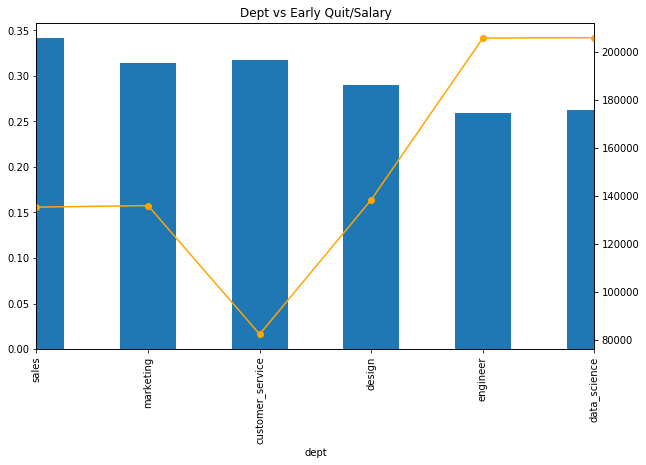

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

ax2  = ax.twinx()
order = ['sales', 'marketing','customer_service', 'design', 'engineer', 'data_science']
data['dept'] = pd.Categorical(data['dept'], order)
data.sort_values(by=['dept'], inplace=True)
data.groupby(['dept'])['early_quitter'].mean().plot.bar(ax=ax)
data.groupby(['dept'])['salary'].mean().plot(kind='line', ax=ax2, marker='o', legend=None, color= 'orange')

ax.set_title('Dept vs Early Quit/Salary')
plt.show()

Sales department had largest early quit rate, around 35% employees quitted within 1 year. While data science and engieers have lower early quit rate around 25%.
And this is correlated to salary, where data science and engineer have higher salary and also lower early quit rate.

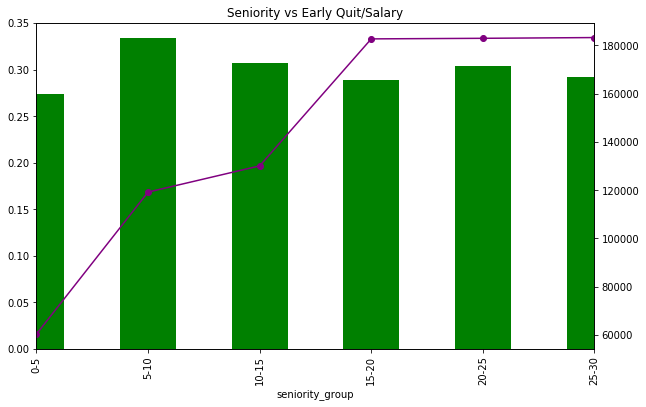

In [10]:
data['seniority_group'] = pd.cut(data.seniority,bins=[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20', '20-25', '25-30'])
fig, ax = plt.subplots(figsize=(10,6))

ax2  = ax.twinx()
order = ['0-5','5-10','10-15','15-20', '20-25', '25-30']
data['seniority_group'] = pd.Categorical(data['seniority_group'], order)
data.sort_values(by=['seniority_group'], inplace=True)
data.groupby(['seniority_group'])['early_quitter'].mean().plot.bar(ax=ax, color = 'green')
data.groupby(['seniority_group'])['salary'].mean().plot(kind='line', ax=ax2, marker='o', legend=None, color= 'purple')

ax.set_title('Seniority vs Early Quit/Salary')
plt.show()

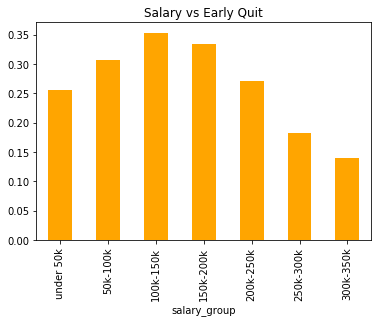

In [11]:
data['salary_group'] = pd.cut(data.salary,bins=[0,50000,100000,150000,200000,250000,300000,350000],labels=['under 50k','50k-100k','100k-150k','150k-200k', '200k-250k', '250k-300k', '300k-350k'])

data.groupby(['salary_group'])['early_quitter'].mean().plot.bar(color='orange', title = 'Salary vs Early Quit')

plt.show()


### Correlation

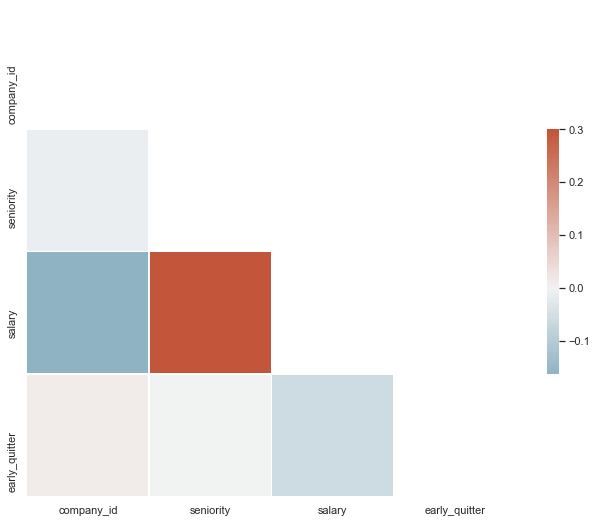

In [12]:
import seaborn as sns

sns.set_theme(style="white")
corr = data[['company_id', 'dept', 'seniority',  'salary', 'early_quitter']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Random Forest 


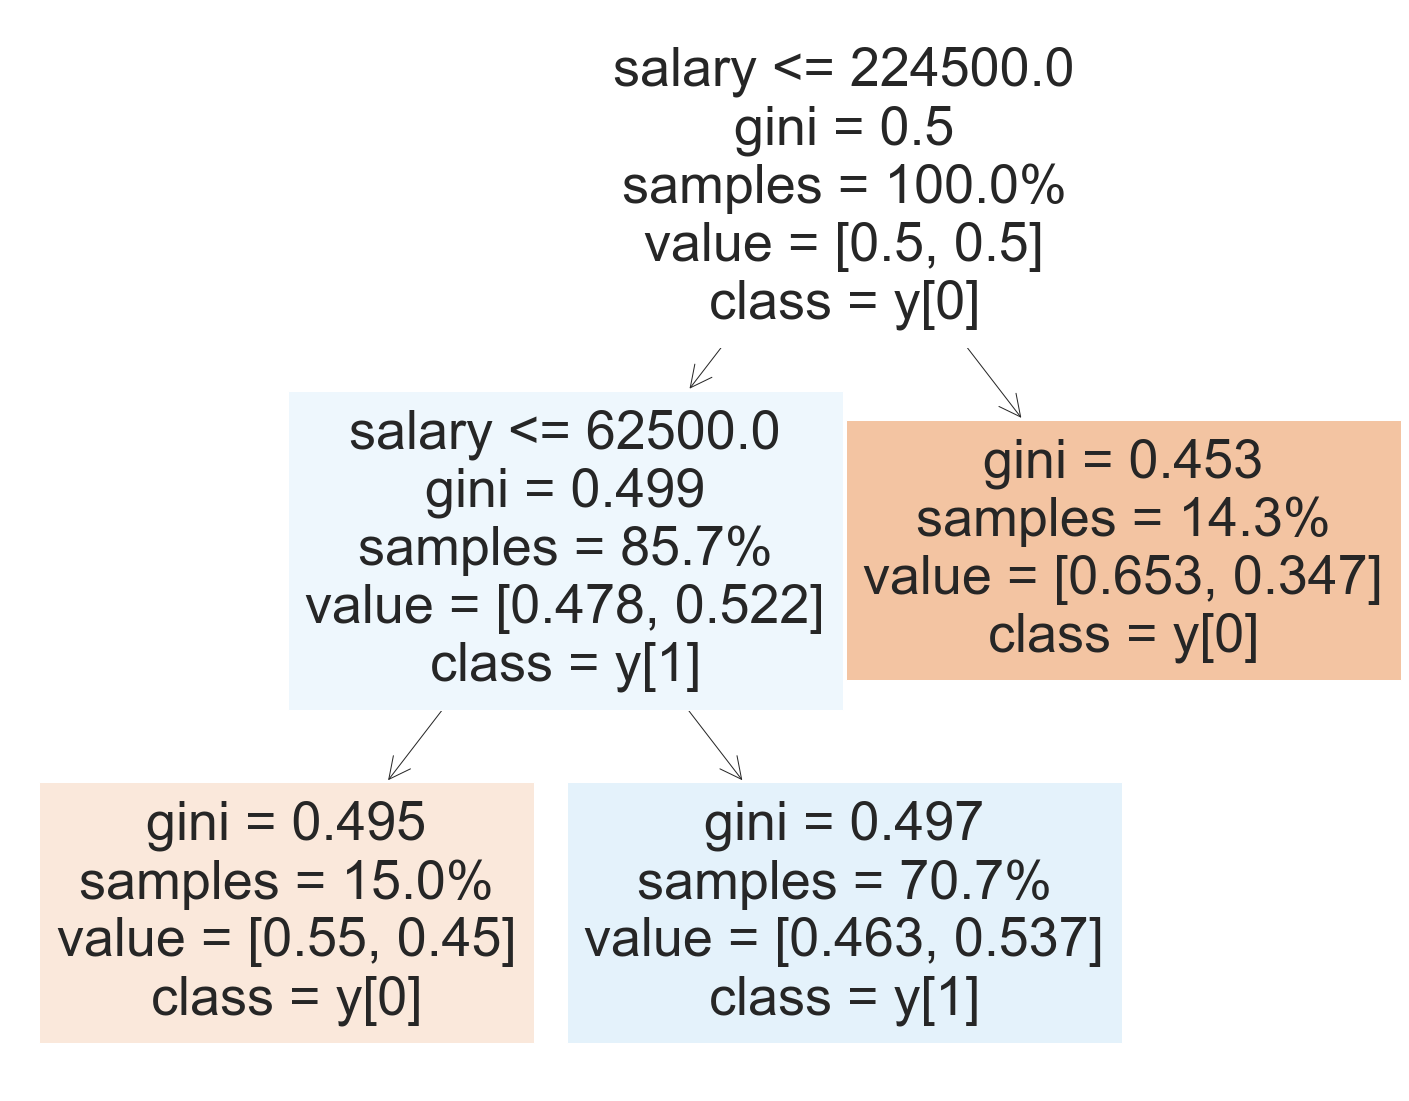

In [18]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data_dummy = pd.get_dummies(data[['company_id', 'dept', 'seniority', 'salary', 'early_quitter']], drop_first=True)           
  

clf = DecisionTreeClassifier( max_depth=4, min_samples_leaf = 30, class_weight="balanced", min_impurity_decrease = 0.001)
clf.fit(data_dummy.drop('early_quitter', axis=1), data['early_quitter'])
  
#tree plot
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=data_dummy.drop('early_quitter', axis=1).columns, 
                   class_names = True, filled = True, proportion=True)

From the decision tree result, we can see that salary is the most import variable to determine a employee to be a early quitter or not. And it probably also correlates to other variables like seniority, department and company. So in our model, salary pretty much includes and carries all information variables.

By looking at terminal nodes, salary between 62,500 abd 224,500 with higher probability of churn early, predicting their value as 1. Whereas salaries outside of this range: less than 62,500 and more than 224,500 are less likely to quit early. 

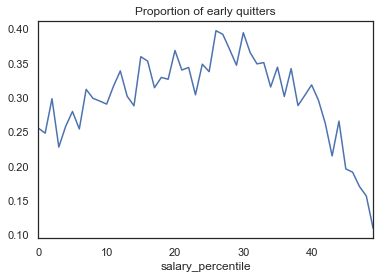

In [14]:
#convert salary to its percentiles. We break it into 50 bins.
data['salary_percentile'] = pd.qcut(data['salary'],q=50, labels=False)
#take proportion of early quitters for each percentile value and plot it
data.groupby('salary_percentile')['early_quitter'].mean().plot(title="Proportion of early quitters")
plt.show()

# Conclusions

1. Salary is an import variable to determine if an employee will quit earlier than one year or not. Variables like promotion or bonus or salary of their next job would be interesting to know and would be key driver of quitting or not. So this would bring in industry compensation data for consideration, and understanding how competitive of our salary level in the industry could help on optimize rentention. 
2. Employees tend to quit at 1st year anniversaries. So even if people don't like their job, many of them would stay for at least one year before quitting. So annual performance evaluation, promotion, compensation/bonus/benefit increase around anniversaries will play important role to change employees' mind of quitting. 
3. Employess with high and low salaries are less likely to quit. High salary group are happy with their current job. Low salay may be people who are less likely to find a alternative job. 
4. In the decision tree model, salary variable carries pretty much all information which is correlated with seniority, company and department... Salary is obviously important, but expecially becuase it's a proxy for other factors (seniority, department, how competitive the employee is in the market, how someone appreciate the job, etc.). In this case, if we have access to the other variables, we can build models to predict salary for future employees/candidates. 